<a href="https://colab.research.google.com/github/Daria-Lytvynenko/ML_course/blob/main/Mid_term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, auc, root_mean_squared_error, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

Mounted at /content/drive


In [2]:
train=pd.read_csv('drive/MyDrive/ML_course/bank-additional-full.csv', sep=";")

In [3]:
train.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#1. EDA

In [5]:
train=train[train['campaign']<=20]

In [6]:
cols=list(train.columns)
cols.remove('y')
cols.append('y')
train=train[cols]

In [7]:
X=train.drop('duration', axis=1).iloc[:, :-1]
y=train.y

<Axes: >

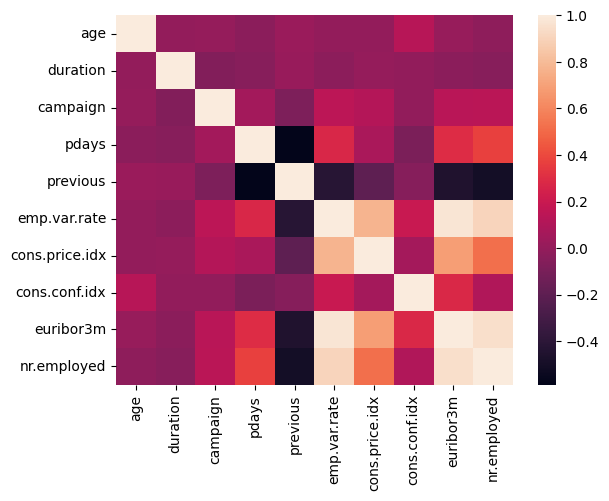

In [8]:
sns.heatmap(train.select_dtypes(exclude='object').corr())

# Графіки розподілу

In [9]:
train[train['age']>69].shape

(469, 21)

In [10]:
job=train.groupby(['job'])[['job','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(job, x='job', y='proportion', color='y', barmode='group', histfunc='avg')
fig.update_layout(width=900, height=450)

In [11]:
education=train.groupby(['education'])[['education','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(education, x='education', y='proportion', color='y', barmode='group', histfunc='avg')
fig.update_layout(width=900, height=450)

In [12]:
age=train.groupby(['age'])[['age','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(age, x='age', y='proportion', color='y', barmode='group', histfunc='avg')
fig.update_layout(width=600, height=300)

In [13]:
housing=train.groupby(['housing'])[['housing','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(housing, x='housing', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train['housing'].nunique()*2)
fig.update_layout(width=600, height=300)

In [14]:
loan=train.groupby(['loan'])[['loan','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(loan, x='loan', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train['loan'].nunique()*2)
fig.update_layout(width=600, height=300)

In [15]:
px.box(train['previous'])

In [16]:
previous=train.groupby(['previous'])[['previous','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(previous, x='previous', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train['previous'].nunique()*2)
fig.update_layout(width=900, height=450)

In [17]:
px.box(train['campaign'])

In [18]:
campaign=train.groupby(['campaign'])[['campaign','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(campaign, x='campaign', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train['campaign'].nunique()*2)
fig.update_layout(width=900, height=450)

In [19]:
px.box(train[train['pdays']<999]['pdays'])

In [20]:
pdays=train[train['pdays']<999].groupby(['pdays'])[['pdays','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(pdays, x='pdays', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train[train['pdays']<999]['pdays'].nunique()*2)
fig.update_layout(width=900, height=450)

In [21]:
default=train.groupby(['default'])[['default','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(default, x='default', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train['default'].nunique()*2)
fig.update_layout(width=900, height=450)

#2. Обгрунтування методів та метрик

Для даної задачі прогнозування оформлення клієнтами банку депозитів вважаю доречним використовувати метрику F1 та орієнтуватись на зменшення рівня хибнонегативних результатів, оскільки в даному випадку ми можемо випустити з уваги потенційних користувачів продукту, не приділивши їм належної уваги при проведенні маркетингових кампаній та інших можливих заходів залучення клієнтів. Рівень хибнопозитивних прогнозів з іншого боку може привести до збільшення витрат на маркетингові заходи, там, де вони потенційно не принесуть результат.

#3. Препроцесинг

##Обробка категоріальних змінних

In [22]:
train['y']=np.where(train['y']=='yes',1,0)

##Групування категорій в категоріальних змінних

##Виявлення outliers

In [27]:
num_cols

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56         1    999         0           1.1          93.994   
1       57         1    999         0           1.1          93.994   
2       37         1    999         0           1.1          93.994   
3       40         1    999         0           1.1          93.994   
4       56         1    999         0           1.1          93.994   
...    ...       ...    ...       ...           ...             ...   
41183   73         1    999         0          -1.1          94.767   
41184   46         1    999         0          -1.1          94.767   
41185   56         2    999         0          -1.1          94.767   
41186   44         1    999         0          -1.1          94.767   
41187   74         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  
0              -36.4      4.857       5191.0  
1              -36.4      4.857       5191.0  
2              -36.4      4.857       5191.0  
3              -36.4      4.857       5191.0  
4              -36.4      4.857       5191.0  
...              ...        ...          ...  
41183          -50.8      1.028       4963.6  
41184          -50.8      1.028       4963.6  
41185          -50.8      1.028       4963.6  
41186          -50.8      1.028       4963.6  
41187          -50.8      1.028       4963.6  

[41031 rows x 9 columns]

In [37]:
np.array(X.select_dtypes(exclude='object').columns).reshape(3,3)[1,1]

'emp.var.rate'

In [47]:
def outliers():
  num_cols=np.array(X.select_dtypes(exclude='object').columns).reshape(3,3)
  fig, ax=plt.subplots(3,3)
  for i in range(3):
   for j in range(3):
    ax[i,j].boxplot(X[num_cols[i,j]])
  fig.show()

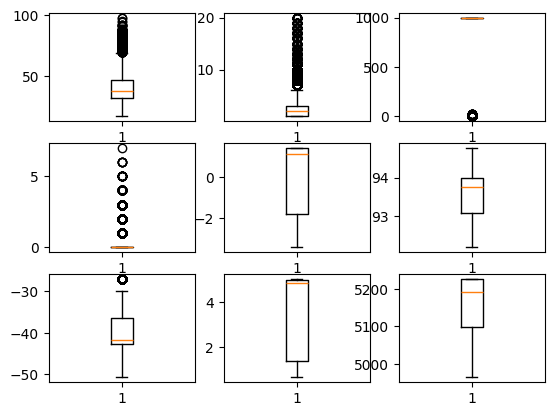

In [48]:
outliers()

In [22]:
px.box(train['age'])

In [23]:
train

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41183       4963.6  1  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  
41187       4963.6  0  

[41031 rows x 21 columns]

In [25]:
train.describe()

age      duration      campaign         pdays      previous  \
count  41031.000000  41031.000000  41031.000000  41031.000000  41031.000000   
mean      40.022836    258.888791      2.474763    962.335697      0.173625   
std       10.424597    259.387065      2.305234    187.254488      0.495731   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    103.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    320.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     20.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41031.000000    41031.000000   41031.000000  41031.000000   
mean       0.077159       93.573657     -40.499522      3.616406   
std        1.571934        0.578708       4.634280      1.735798   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed             y  
count  41031.000000  41031.000000  
mean    5166.828437      0.113061  
std       72.302112      0.316671  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000

##Створення додаткових ознак

Зробити змінну чи  був попередній контакт 1/0;
Змінна спроба попереднього контакту, виходячи зі змінної poutcome - failure success -1, nonexistent - 0; campaign можна почистити від викидів (попередньо більше 20); змінна з фейловою попередньою кампанією; створити колонку, яка буде позначати клієнтів, у яких не було контакту (pdays=999) та на яких зафейлилась попередня кампанія (всі інші 0)

In [121]:
#наявність попереднього контакту
train['prev_contact']=np.where(train['pdays']==999, 'yes', 'no')

In [122]:
#маркер залученості клієнта до попередньої маркетингової кампанії
train['prev_campaign']=np.where((train['poutcome']=='failure')|(train['poutcome']=='success'), 'yes', 'no')

In [123]:
#неуспішна попередня маркетингова кампанія та відсутність попереднього контакту
train['prev_fail_no_contact']=np.where((train['poutcome']=='failure')&(train['pdays']==999), 'yes', 'no')

# Моделі

In [142]:
input_cols=X.columns.to_list()
target_col=train.iloc[:,-1].name

In [143]:
numeric_cols=X.select_dtypes(exclude='object').columns.tolist()
categorical_cols=X.select_dtypes(include='object').columns.tolist()

In [144]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [145]:
ordinal_col=['education']
categorical_cols.remove('education')

In [146]:
categories=['unknown','illiterate','basic.4y', 'high.school', 'basic.6y',
                                                         'basic.9y','professional.course', 'university.degree']

## Логістична регресія

In [147]:
numeric_transformer=Pipeline(steps=[('scaler', StandardScaler())])
one_hot_enc=Pipeline(steps=[('onehot', OneHotEncoder())])
ordinal_enc=Pipeline(steps=[('ordinal', OrdinalEncoder(categories=[categories]))])

preprocessor=ColumnTransformer(transformers=[
                                            ('onehot', one_hot_enc, categorical_cols),
                                            ('ordinal', ordinal_enc, ordinal_col),
                                            ('scaler', numeric_transformer, numeric_cols)
],remainder='passthrough')

model_pipeline=Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(solver='liblinear',  penalty='l1', class_weight={1:8, 0:1}))])

In [148]:
model_pipeline.fit(X_train, y_train)
pred=model_pipeline.predict(X_train)
pred_proba=model_pipeline.predict_proba(X_train)[:,1]
fpr, tpr, thresholds=roc_curve(y_train, pred_proba)
roc_auc=auc(fpr, tpr)
print(roc_auc)
confusion_matrix(y_train, pred)
f1_score(y_train, pred)
print(classification_report(y_train, pred))

0.7936251947144357
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     29113
           1       0.35      0.62      0.45      3711

    accuracy                           0.83     32824
   macro avg       0.65      0.74      0.67     32824
weighted avg       0.88      0.83      0.85     32824



In [149]:
model_pipeline.named_steps['classifier']

LogisticRegression(class_weight={0: 1, 1: 8}, penalty='l1', solver='liblinear')

In [150]:
corrected_tr=0.6

In [159]:
pred=model_pipeline.predict(X_test)
pred_corr=(pred_proba>corrected_tr).astype('int')
pred_proba_test=model_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, pred_proba_test)
roc_auc=auc(fpr, tpr)
print(roc_auc)
print(confusion_matrix(y_test, pred))
f1_score(y_test, pred)
print(classification_report(y_test, pred))

0.8029852202367699
[[6234 1045]
 [ 330  598]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7279
           1       0.36      0.64      0.47       928

    accuracy                           0.83      8207
   macro avg       0.66      0.75      0.68      8207
weighted avg       0.88      0.83      0.85      8207



In [160]:
pred=model_pipeline.predict(X_test)
pred_proba_test=model_pipeline.predict_proba(X_test)[:,1]
pred_corr=(pred_proba_test>corrected_tr).astype('int')
fpr, tpr, thresholds=roc_curve(y_test, pred_proba_test)
roc_auc=auc(fpr, tpr)
print(roc_auc)
print(confusion_matrix(y_test, pred_corr))
f1_score(y_test, pred_corr)
print(classification_report(y_test, pred_corr))

0.8029852202367699
[[6435  844]
 [ 352  576]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7279
           1       0.41      0.62      0.49       928

    accuracy                           0.85      8207
   macro avg       0.68      0.75      0.70      8207
weighted avg       0.89      0.85      0.87      8207



In [35]:
test_pred_logreg=pd.concat([X_test, y_test, pd.Series(pred, index=X_test.index, name='pred')], axis=1)

In [36]:
test_pred_logreg[test_pred_logreg['y']!=test_pred_logreg['pred']]

age         job   marital            education  default housing loan  \
19245   32  technician    single  professional.course       no      no   no   
34901   42    services   married          high.school       no      no   no   
38382   54   housemaid   married  professional.course       no      no   no   
40922   61      admin.   married          high.school       no     yes   no   
38177   54  management  divorced    university.degree  unknown     yes   no   
...    ...         ...       ...                  ...      ...     ...  ...   
19044   42  technician   married  professional.course       no     yes   no   
37717   29      admin.   married    university.degree       no     yes   no   
9998    41  technician   married  professional.course  unknown     yes   no   
37067   42  technician   married    university.degree       no      no  yes   
29353   40      admin.    single          high.school       no     yes   no   

         contact month day_of_week  ...  emp.var.rate  cons.price.idx  \
19245   cellular   aug         wed  ...           1.4          93.444   
34901   cellular   may         fri  ...          -1.8          92.893   
38382  telephone   oct         mon  ...          -3.4          92.431   
40922   cellular   oct         mon  ...          -1.1          94.601   
38177   cellular   oct         thu  ...          -3.4          92.431   
...          ...   ...         ...  ...           ...             ...   
19044   cellular   aug         tue  ...           1.4          93.444   
37717   cellular   aug         thu  ...          -2.9          92.201   
9998   telephone   jun         wed  ...           1.4          94.465   
37067   cellular   jul         wed  ...          -2.9          92.469   
29353   cellular   apr         fri  ...          -1.8          93.075   

       cons.conf.idx euribor3m  nr.employed  prev_contact  prev_campaign  \
19245          -36.1     4.967       5228.1           yes             no   
34901          -46.2     1.250       5099.1           yes            yes   
38382          -26.9     0.739       5017.5           yes             no   
40922          -49.5     0.977       4963.6           yes             no   
38177          -26.9     0.754       5017.5           yes             no   
...              ...       ...          ...           ...            ...   
19044          -36.1     4.968       5228.1           yes             no   
37717          -31.4     0.851       5076.2           yes            yes   
9998           -41.8     4.959       5228.1           yes             no   
37067          -33.6     1.029       5076.2           yes             no   
29353          -47.1     1.405       5099.1           yes            yes   

       prev_fail_no_contact  y pred  
19245                    no  1    0  
34901                   yes  1    0  
38382                    no  0    1  
40922                    no  0    1  
38177                    no  0    1  
...                     ... ..  ...  
19044                    no  1    0  
37717                   yes  0    1  
9998                     no  1    0  
37067                    no  0    1  
29353                   yes  0    1  

[1375 rows x 24 columns]

In [37]:
test_pred_logreg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8207 entries, 26682 to 5843
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   8207 non-null   int64  
 1   job                   8207 non-null   object 
 2   marital               8207 non-null   object 
 3   education             8207 non-null   object 
 4   default               8207 non-null   object 
 5   housing               8207 non-null   object 
 6   loan                  8207 non-null   object 
 7   contact               8207 non-null   object 
 8   month                 8207 non-null   object 
 9   day_of_week           8207 non-null   object 
 10  campaign              8207 non-null   int64  
 11  pdays                 8207 non-null   int64  
 12  previous              8207 non-null   int64  
 13  poutcome              8207 non-null   object 
 14  emp.var.rate          8207 non-null   float64
 15  cons.price.idx        

In [38]:
def custom_subplots():
  dataset=pd.concat([test_pred_logreg.select_dtypes(include='category'), test_pred_logreg[['y','pred']]], axis=1)
  fig=make_subplots(rows=7, cols=2, subplot_titles=dataset.iloc[:,:-2].columns)
  a=0
  for j in dataset.iloc[:,:-2].columns:
    a+=1
    subset=dataset.groupby([j])[[j,'y']].value_counts(normalize=True).reset_index()
    unique_y = subset['y'].unique()
    for y_val in unique_y:
        subset_y = subset[subset['y'] == y_val]
        fig.add_trace(go.Histogram(x=subset_y[j], y=subset_y['proportion'], histfunc='avg'), row=(a+1)//2, col=(a%2)+1)
  fig.update_layout( width=1500, height=3000)
  subplot_titles=dataset.iloc[:,:-2].columns
  for i, title in enumerate(subplot_titles):
    fig.layout.annotations[i].update(text=title)
  return fig.show()

In [39]:
custom_subplots()

In [40]:
def custom_subplots_pred():
  dataset=pd.concat([test_pred_logreg.select_dtypes(include='category'), test_pred_logreg[['y','pred']]], axis=1)
  fig=make_subplots(rows=7, cols=2, subplot_titles=dataset.iloc[:,:-2].columns)
  a=0
  for j in dataset.iloc[:,:-2].columns:
    a+=1
    subset=dataset.groupby([j])[[j,'pred']].value_counts(normalize=True).reset_index()
    unique_y = subset['pred'].unique()
    for y_val in unique_y:
        subset_y = subset[subset['pred'] == y_val]
        fig.add_trace(go.Histogram(x=subset_y[j], y=subset_y['proportion'], histfunc='avg'), row=(a+1)//2, col=(a%2)+1)
  fig.update_layout( width=1500, height=3000)
  subplot_titles=dataset.iloc[:,:-2].columns
  for i, title in enumerate(subplot_titles):
    fig.layout.annotations[i].update(text=title)
  return fig.show()

In [41]:
custom_subplots_pred()

In [42]:
pdays=train[train['pdays']<999].groupby(['pdays'])[['pdays','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(pdays, x='pdays', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train[train['pdays']<999]['pdays'].nunique()*2)
fig.update_layout(width=900, height=450)

In [43]:
confusion_matrix(y_test, pred)

array([[6234, 1045],
       [ 330,  598]])

In [44]:
px.histogram(pred_proba)

In [45]:
features_importance=pd.DataFrame(preprocessor.get_feature_names_out(), [float(value) for value in np.round(model_pipeline.named_steps['classifier'].coef_[0],4)],
                                 columns=['feature'] ).reset_index().sort_values(by=['index','feature'], ascending=False)

In [46]:
features_importance.head(40)


index                           feature
32  1.3491                 onehot__month_mar
57  1.1287            scaler__cons.price.idx
59  0.5113                 scaler__euribor3m
28  0.4320                 onehot__month_aug
60  0.3762               scaler__nr.employed
29  0.3684                 onehot__month_dec
44  0.3543          onehot__poutcome_success
8   0.2764               onehot__job_student
5   0.2764               onehot__job_retired
41  0.1477           onehot__day_of_week_wed
36  0.1243                 onehot__month_sep
58  0.1040             scaler__cons.conf.idx
16  0.0884                onehot__default_no
14  0.0713            onehot__marital_single
22  0.0508                   onehot__loan_no
37  0.0290           onehot__day_of_week_fri
2   0.0206          onehot__job_entrepreneur
51  0.0189                ordinal__education
0   0.0142                onehot__job_admin.
4   0.0095            onehot__job_management
19  0.0068                onehot__housing_no
50  0.0000  onehot__prev_fail_no_contact_yes
49  0.0000   onehot__prev_fail_no_contact_no
45  0.0000           onehot__prev_contact_no
48  0.0000         onehot__prev_campaign_yes
47  0.0000          onehot__prev_campaign_no
43  0.0000      onehot__poutcome_nonexistent
30  0.0000                 onehot__month_jul
13  0.0000           onehot__marital_married
24  0.0000                  onehot__loan_yes
11  0.0000               onehot__job_unknown
21  0.0000               onehot__housing_yes
20  0.0000           onehot__housing_unknown
18  0.0000               onehot__default_yes
39  0.0000           onehot__day_of_week_thu
25  0.0000          onehot__contact_cellular
52 -0.0008                       scaler__age
6  -0.0028         onehot__job_self-employed
12 -0.0132          onehot__marital_divorced
15 -0.0254           onehot__marital_unknown

## Логістична регресія зі SMOTENC

In [47]:
num_cols_processed=['scaler__'+i for i in numeric_cols]

In [48]:
features=[i for i in preprocessor.get_feature_names_out().tolist() if i not in num_cols_processed]

In [49]:
X_train_smenc=pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test_smenc=pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [50]:
smenc=SMOTENC(random_state=42, categorical_features=features)
X_train_smenc, y_train_smenc=smenc.fit_resample(X_train_smenc, y_train)

In [51]:
logreg=LogisticRegression(solver='saga',  penalty='l2')
logreg.fit(X_train_smenc, y_train_smenc)
pred=logreg.predict(X_train_smenc)
pred_proba=logreg.predict_proba(X_train_smenc)[:,1]
fpr, tpr, thresholds=roc_curve(y_train_smenc, pred_proba)
roc_auc=auc(fpr, tpr)
print(roc_auc)
print(confusion_matrix(y_train_smenc, pred))
f1_score(y_train_smenc, pred)
print(classification_report(y_train_smenc, pred))

0.8970986107644341
[[26077  3036]
 [ 7241 21872]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84     29113
           1       0.88      0.75      0.81     29113

    accuracy                           0.82     58226
   macro avg       0.83      0.82      0.82     58226
weighted avg       0.83      0.82      0.82     58226



In [103]:
pred=logreg.predict(X_test_smenc)
pred_proba=logreg.predict_proba(X_test_smenc)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, pred_proba)
roc_auc=auc(fpr, tpr)
print(roc_auc)
print(confusion_matrix(y_test, pred))
f1_score(y_test, pred)
print(classification_report(y_test, pred))

0.7785396019962955
[[6531  748]
 [ 439  489]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7279
           1       0.40      0.53      0.45       928

    accuracy                           0.86      8207
   macro avg       0.67      0.71      0.68      8207
weighted avg       0.88      0.86      0.86      8207



In [104]:
pred=logreg.predict(X_test_smenc)
pred_corr=(pred_proba>corrected_tr).astype('int')
pred_proba=logreg.predict_proba(X_test_smenc)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, pred_proba)
roc_auc=auc(fpr, tpr)
print(roc_auc)
print(confusion_matrix(y_test, pred_corr))
f1_score(y_test, pred_corr)
print(classification_report(y_test, pred_corr))

0.7785396019962955
[[6830  449]
 [ 513  415]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7279
           1       0.48      0.45      0.46       928

    accuracy                           0.88      8207
   macro avg       0.71      0.69      0.70      8207
weighted avg       0.88      0.88      0.88      8207



In [115]:
pred=logreg.predict(X_test_smenc)
pred_corr=(pred_proba>corrected_tr).astype('int')
pred_proba=logreg.predict_proba(X_test_smenc)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, pred_proba)
roc_auc=auc(fpr, tpr)
print(roc_auc)
print(confusion_matrix(y_test, pred_corr))
f1_score(y_test, pred_corr)
print(classification_report(y_test, pred_corr))

0.7785396019962955
[[6812  467]
 [ 507  421]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7279
           1       0.47      0.45      0.46       928

    accuracy                           0.88      8207
   macro avg       0.70      0.69      0.70      8207
weighted avg       0.88      0.88      0.88      8207



In [72]:
thresholds=pd.concat([y_test,pd.Series(pred, name='pred', index=y_test.index),
           pd.Series(pred_proba, name='pred_proba', index=y_test.index)], axis=1)

In [116]:
corrected_tr=0.60

In [101]:
(pred_proba>corrected_tr).astype('int')

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
thresholds['tr_pred']=(thresholds['pred_proba']>corrected_tr).astype('int')

In [97]:
thresholds[thresholds['y']!=thresholds['tr_pred']]

y  pred  pred_proba  tr_pred
39851  1     1    0.514190        0
19245  1     0    0.290123        0
34901  1     0    0.212597        0
40922  0     1    0.737549        1
37007  0     1    0.631229        1
...   ..   ...         ...      ...
30324  0     1    0.632709        1
19044  1     0    0.246450        0
38794  1     0    0.499046        0
9998   1     0    0.155507        0
37067  0     1    0.646351        1

[962 rows x 4 columns]

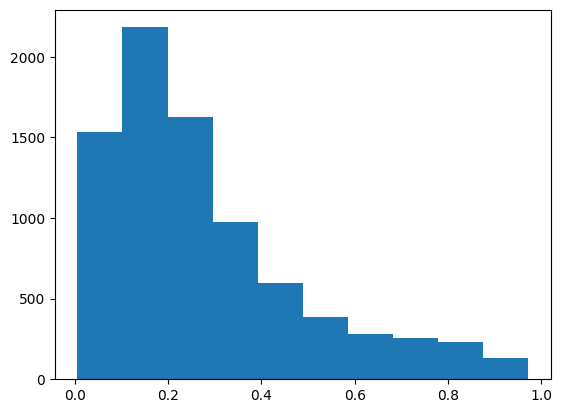

In [93]:
plt.hist(thresholds['pred_proba']);

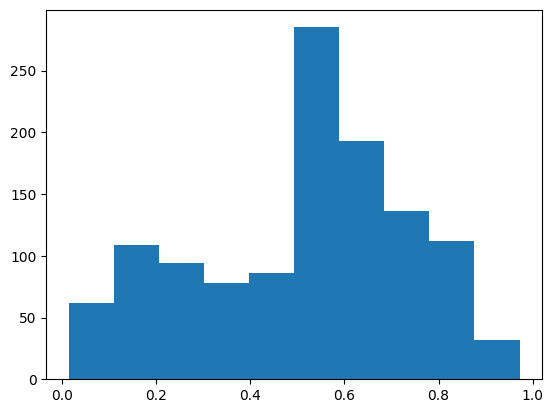

In [79]:
plt.hist(thresholds[thresholds['y']!=thresholds['pred']]['pred_proba']);

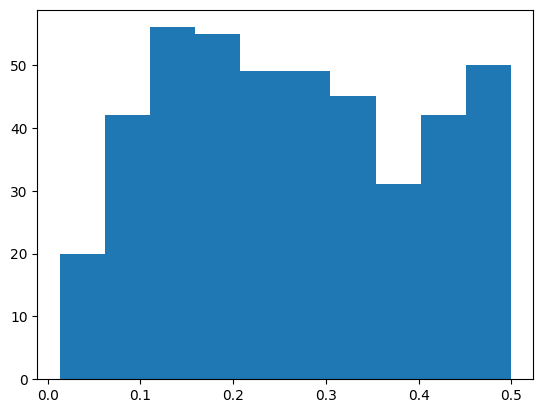

In [82]:
plt.hist(thresholds[(thresholds['y']==1)&(thresholds['pred']==0)]['pred_proba']);

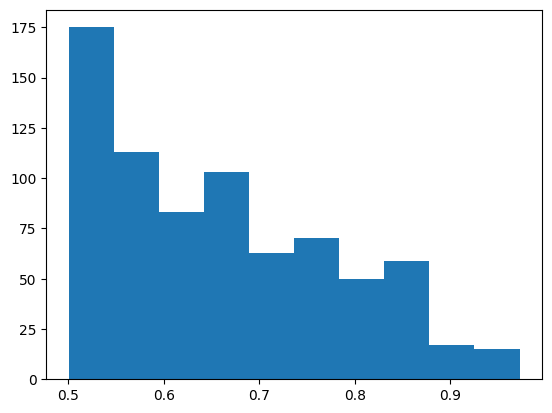

In [90]:
plt.hist(thresholds[(thresholds['y']==0)&(thresholds['pred']==1)]['pred_proba']);

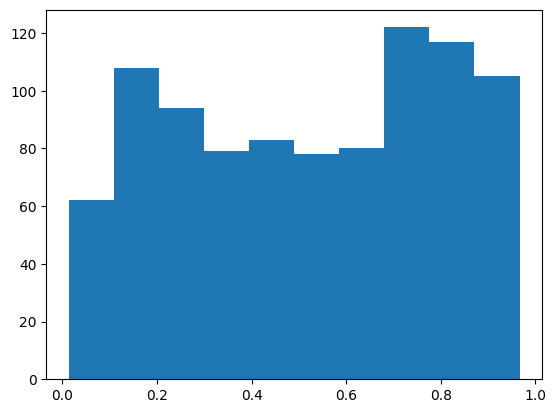

In [80]:
plt.hist(thresholds[thresholds['y']==1]['pred_proba']);

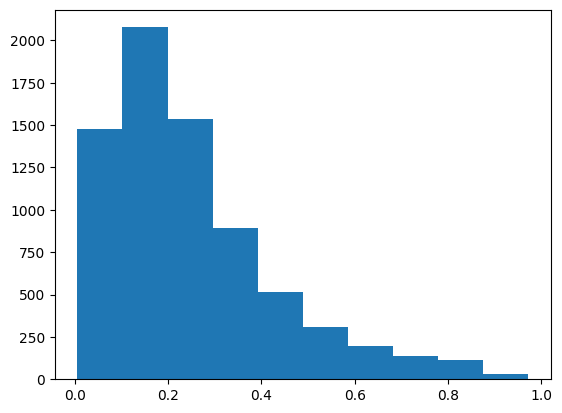

In [81]:
plt.hist(thresholds[thresholds['y']==0]['pred_proba']);

In [ ]:
logreg_list=pd.DataFrame(list(zip(preprocessor.get_feature_names_out().tolist(),
 [float(value) for value in np.round(logreg.coef_[0],4)])),
                         columns=['features', 'importance']).sort_values(by='importance', ascending=False)

In [ ]:
logreg_list.head(40)

features  importance
46          onehot__prev_contact_yes      3.0799
25          onehot__contact_cellular      2.4003
16                onehot__default_no      2.0400
48         onehot__prev_campaign_yes      1.9114
49   onehot__prev_fail_no_contact_no      1.7160
50  onehot__prev_fail_no_contact_yes      1.6377
44          onehot__poutcome_success      1.6293
43      onehot__poutcome_nonexistent      1.4422
47          onehot__prev_campaign_no      1.4422
17           onehot__default_unknown      1.3763
57            scaler__cons.price.idx      1.3007
26         onehot__contact_telephone      0.9533
60               scaler__nr.employed      0.7185
59                 scaler__euribor3m      0.4060
42          onehot__poutcome_failure      0.2821
45           onehot__prev_contact_no      0.2737
22                   onehot__loan_no      0.2118
58             scaler__cons.conf.idx      0.1815
51                ordinal__education      0.0974
52                       scaler__age      0.0334
18               onehot__default_yes     -0.0626
55                  scaler__previous     -0.0720
53                  scaler__campaign     -0.1433
24                  onehot__loan_yes     -0.3777
54                     scaler__pdays     -0.6344
32                 onehot__month_mar     -0.8838
20           onehot__housing_unknown     -1.5892
23              onehot__loan_unknown     -1.5892
29                 onehot__month_dec     -1.8108
36                 onehot__month_sep     -2.1876
27                 onehot__month_apr     -2.2530
28                 onehot__month_aug     -2.2865
21               onehot__housing_yes     -2.4608
56              scaler__emp.var.rate     -2.4742
19                onehot__housing_no     -2.5056
35                 onehot__month_oct     -2.5410
30                 onehot__month_jul     -2.5665
33                 onehot__month_may     -2.6167
31                 onehot__month_jun     -3.0429
13           onehot__marital_married     -3.1134

## KNN

In [ ]:
X_train_transf=preprocessor.fit_transform(X_train)
X_test_transf=preprocessor.transform(X_test)

In [ ]:
def search_model(search):
  model_search=search
  model_search.fit(X_train_transf, y_train)
  best_model=model_search.best_estimator_
  print(f'best params: {model_search.best_params_} \nbest score: {model_search.best_score_}')
  return best_model

In [ ]:
X_test_transf.shape

(8207, 61)

In [ ]:
def predictions(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  pred_train=model.predict(X_train)
  pred_val=model.predict(X_test)
  pred_proba_train=model.predict_proba(X_train)[:,1]
  pred_proba_val=model.predict_proba(X_test)[:,1]
  fpr_tr, tpr_tr, threshold_tr=roc_curve(y_train, pred_proba_train)
  fpr_val, tpr_val, threshold_val=roc_curve(y_test, pred_proba_val)
  roc_auc_tr=auc(fpr_tr, tpr_tr)
  roc_auc_val=auc(fpr_val, tpr_val)
  print(f'roc auc train: {roc_auc_tr} \nroc auc val: {roc_auc_val}')
  return model

In [ ]:
predictions(KNeighborsClassifier(),X_train_smenc, X_test_smenc, y_train_smenc, y_test)

roc auc train: 0.9836181443069295 
roc auc val: 0.7305139578428261


KNeighborsClassifier()

In [ ]:
params_knn = {'n_neighbors': np.arange(1,10)}

In [ ]:
knn_best=predictions(search_model(GridSearchCV(estimator=KNeighborsClassifier(),
                                      param_grid=params_knn,
                                      cv=5,
                                      scoring='f1')), X_train_smenc, X_test_smenc, y_train_smenc, y_test)

best params: {'n_neighbors': np.int64(9)} 
best score: 0.3714667273859879
roc auc train: 0.9698054071537106 
roc auc val: 0.7413116558735331


## Tree

In [ ]:
parameters_tree={'max_depth': np.arange(1,20,1), 'max_leaf_nodes': np.arange(2,10,1) }

In [ ]:
dt_best=predictions(search_model(GridSearchCV(DecisionTreeClassifier(random_state=42),
                                      param_grid=parameters_tree,
                                      cv=5,
                                      scoring='roc_auc'
                                      )), X_train_smenc, X_test_smenc, y_train_smenc, y_test)

best params: {'max_depth': np.int64(4), 'max_leaf_nodes': np.int64(9)} 
best score: 0.7526865368068822
roc auc train: 0.7934148064740845 
roc auc val: 0.7731022254620046


In [ ]:
tree_feat_import=pd.DataFrame(list(zip(preprocessor.get_feature_names_out().tolist(), [float(value) for value in np.round(dt_best.feature_importances_,4)])),
                         columns=['features', 'importance']).sort_values(by='importance', ascending=False)

In [ ]:
tree_feat_import.head(10)

features  importance
60        scaler__nr.employed      0.6638
58      scaler__cons.conf.idx      0.1565
25   onehot__contact_cellular      0.0711
59          scaler__euribor3m      0.0516
35          onehot__month_oct      0.0298
53           scaler__campaign      0.0272
5         onehot__job_retired      0.0000
7        onehot__job_services      0.0000
6   onehot__job_self-employed      0.0000
1     onehot__job_blue-collar      0.0000

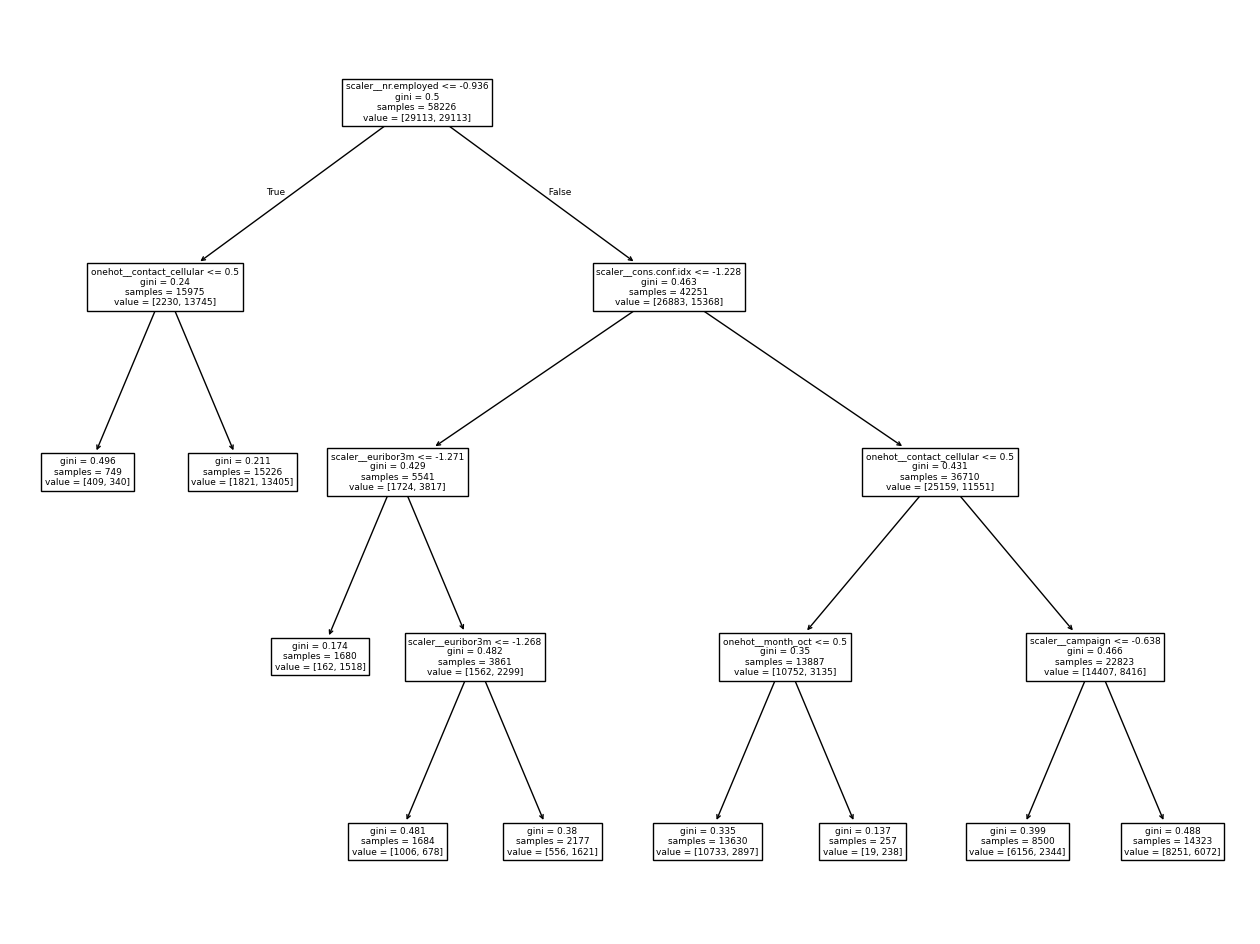

In [ ]:
plt.figure(figsize=(16,12))
plot_tree(dt_best, feature_names=preprocessor.get_feature_names_out());

## Light GBM

In [ ]:
params_lgbm={'n_estimators': np.arange( 50, 500, 25),
    'learning_rate': np.arange( 0.01, 0.3, 0.01),
    'max_depth': np.arange(3, 15),
    'num_leaves': np.arange(20, 200),
    'min_child_weight': np.arange(1, 10),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.arange(0.0, 1.0, 0.1),
    'reg_lambda': np.arange(0.0, 1.0, 0.1),
    'min_split_gain': np.arange(0.0, 0.1, 0.1),
    'scale_pos_weight':np.arange(0.1, 10.0, 0.1)}

In [ ]:
best_lgbm=predictions(search_model(RandomizedSearchCV(lgb.LGBMClassifier(random_state=42), param_distributions= params_lgbm,
                                            cv=3, scoring='roc_auc',
                                            n_iter=40,
                                            random_state=42)), X_train_smenc, X_test_smenc, y_train_smenc, y_test)

Показано результат, скорочений до останніх рядків (5000).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.113056 -> initscore=-2.059901
[LightGBM] [Info] Start training from score -2.059901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [ ]:
best_lgbm

LGBMClassifier(colsample_bytree=np.float64(0.5), learning_rate=np.float64(0.01),
               max_depth=np.int64(7), min_child_weight=np.int64(3),
               min_split_gain=np.float64(0.0), n_estimators=np.int64(100),
               num_leaves=np.int64(196), random_state=42,
               reg_alpha=np.float64(0.5), reg_lambda=np.float64(0.2),
               scale_pos_weight=np.float64(3.0000000000000004),
               subsample=np.float64(0.5))

In [ ]:
final_lgb_clf

LGBMClassifier(cat_feature=['job', 'marital', 'education', 'default', 'housing',
                            'loan', 'contact', 'month', 'day_of_week',
                            'poutcome', 'prev_contact', 'prev_campaign',
                            'prev_fail_no_contact'],
               colsample_bytree=np.float64(0.7933661021859246),
               learning_rate=np.float64(0.10323008476574731), max_depth=9,
               min_child_weight=8,
               min_split_gain=np.float64(0.018830085093768656), missing=nan,
               n_estimators=125, num_leaves=143,
               reg_alpha=np.float64(0.8389606868867016),
               reg_lambda=np.float64(0.9298311860539257),
               scale_pos_weight=np.float64(0.6787178952831239),
               subsample=np.float64(0.6928145740417968))

In [ ]:
categorical_cols=X_train.select_dtypes(include='object').columns.tolist()

In [ ]:
X_train[categorical_cols]=X_train[categorical_cols].astype('category')
X_test[categorical_cols]=X_test[categorical_cols].astype('category')

In [ ]:
cats=X_train.select_dtypes(include='category').columns.tolist()

In [ ]:
smenc=SMOTENC(random_state=42, categorical_features=cats)
X_tr_smenc, y_tr_smenc=smenc.fit_resample(X_train, y_train)

In [ ]:
def objective(params):
    clf = lgb.LGBMClassifier(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        num_leaves=int(params['num_leaves']),
        min_child_weight=params['min_child_weight'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        min_split_gain=params['min_split_gain'],
        cat_feature=cats,
        scale_pos_weight=params['scale_pos_weight']
    )

    clf.fit(X_tr_smenc, y_tr_smenc, eval_set=[(X_test, y_test)])
    pred = clf.predict(X_test)
    pred_proba=clf.predict_proba(X_test)[:,1]
    fpr_val, tpr_val, threshold_val=roc_curve(y_test, pred_proba)
    roc_auc=auc(fpr_val, tpr_val)

    return {'loss': -roc_auc, 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 25),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 200, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'min_split_gain': hp.uniform('min_split_gain', 0, 0.1),
    'scale_pos_weight':hp.uniform('scale_pos_weight', 0.1, 10)}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['num_leaves'] = int(best['num_leaves'])
best['min_child_weight'] = int(best['min_child_weight'])

print("Найкращі гіперпараметри: ", best)

final_lgb_clf = lgb.LGBMClassifier(
    n_estimators=best['n_estimators'],
    learning_rate=best['learning_rate'],
    max_depth=best['max_depth'],
    num_leaves=best['num_leaves'],
    min_child_weight=best['min_child_weight'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    min_split_gain=best['min_split_gain'],
    cat_feature=cats,
    missing=np.nan,
    scale_pos_weight=best['scale_pos_weight']
)

final_lgb_clf.fit(X_tr_smenc, y_tr_smenc, eval_set=[(X_test, y_test)])
final_pred = final_lgb_clf.predict(X_test)
pred_proba=final_lgb_clf.predict_proba(X_test)[:,1]
fpr_val, tpr_val, threshold_val=roc_curve(y_test, pred_proba)
roc_auc_final=auc(fpr_val, tpr_val)

print("Точність на валідаційній вибірці: {:.4f}".format(roc_auc_final))

print(classification_report(y_test, final_pred, digits=4))


[LightGBM] [Warning] categorical_feature is set with cat_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,prev_contact,prev_campaign,prev_fail_no_contact, categorical_column=1,2,3,4,5,6,7,8,9,13,19,20,21 will be ignored. Current value: categorical_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,prev_contact,prev_campaign,prev_fail_no_contact
[LightGBM] [Info] Number of positive: 29113, number of negative: 29113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 58226, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

# Other

In [ ]:
a=train[train['pdays']<999]

In [ ]:
px.box(train['previous'])

In [ ]:
train.select_dtypes(include='object').iloc[:,:-1].columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'prev_contact', 'prev_campaign'],
      dtype='object')

In [ ]:
def custom_subplots():
  dataset=train.select_dtypes(include='category')
  fig=make_subplots(rows=5, cols=2, subplot_titles=dataset.iloc[:,:-1].columns)
  a=0
  for j in dataset.iloc[:,:-1].columns:
    a+=1
    subset=dataset.groupby([j])[[j,'y']].value_counts(normalize=True).reset_index()
    for y_val in subset['y'].unique():
      sub_c = subset[subset['y'] == y_val]
      fig.add_trace(go.Bar(x=sub_c[j], y=sub_c['proportion'], name=y_val), row=(a+1)//2, col=(a%2)+1)
  fig.update_layout(barmode='group', width=1000, height=1500)
  return fig.show()

In [ ]:
frame=pd.DataFrame(columns=['value', 'proportion'])
def proportions(frame):
  for i in train.iloc[:,:-1].select_dtypes(include='object').columns:
    counts=pd.DataFrame(columns=['value', 'proportion'])
    counts['feature']=pd.Series([i]*train[i].nunique())
    counts['value']=train[i].value_counts(normalize=True).reset_index().iloc[:,0]
    counts['proportion']=train[i].value_counts(normalize=True).reset_index().iloc[:,1]
    frame=pd.concat([frame,counts], axis=0)
  return pd.DataFrame(frame)